In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
#sys.path.append("../../")
#sys.path.append("../")
import os
import numpy as np
import json
from matplotlib import pyplot as plt
from prepare_data import *
import prepare_synth_data


In [36]:
print('traversing data directory...')
stroke_fnames, transcriptions, writer_ids = collect_data()

print('dumping to numpy arrays...')
x = np.zeros([len(stroke_fnames), drawing.MAX_STROKE_LEN, 3], dtype=np.float32)
x_len = np.zeros([len(stroke_fnames)], dtype=np.int16)
c = np.zeros([len(stroke_fnames), drawing.MAX_CHAR_LEN], dtype=np.int8)
c_len = np.zeros([len(stroke_fnames)], dtype=np.int8)
w_id = np.zeros([len(stroke_fnames)], dtype=np.int16)
valid_mask = np.zeros([len(stroke_fnames)], dtype=np.bool)

for i, (stroke_fname, c_i, w_id_i) in enumerate(zip(stroke_fnames, transcriptions, writer_ids)):
    if i % 200 == 0:
        print(i, '\t', '/', len(stroke_fnames))
    coords, x_i = get_stroke_sequence(stroke_fname)
    stop
    valid_mask[i] = ~np.any(np.linalg.norm(x_i[:, :2], axis=1) > 60)

    x[i, :len(x_i), :] = x_i
    x_len[i] = len(x_i)

    c[i, :len(c_i)] = c_i
    c_len[i] = len(c_i)

    w_id[i] = w_id_i

if not os.path.isdir('data/processed'):
    os.makedirs('data/processed')

np.save('data/processed/x.npy', x[valid_mask])
np.save('data/processed/x_len.npy', x_len[valid_mask])
np.save('data/processed/c.npy', c[valid_mask])
np.save('data/processed/c_len.npy', c_len[valid_mask])
np.save('data/processed/w_id.npy', w_id[valid_mask])


traversing data directory...
0 data/raw/ascii/a01/a01-000/a01-000u.txt
1 data/raw/ascii/a01/a01-000/a01-000x.txt
2 data/raw/ascii/a01/a01-001/a01-001w.txt
3 data/raw/ascii/a01/a01-001/a01-001z.txt
4 data/raw/ascii/a01/a01-003/a01-003.txt
5 data/raw/ascii/a01/a01-003/a01-003x.txt
6 data/raw/ascii/a01/a01-004/a01-004.txt
7 data/raw/ascii/a01/a01-004/a01-004w.txt
8 data/raw/ascii/a01/a01-007/a01-007.txt
9 data/raw/ascii/a01/a01-007/a01-007w.txt
10 data/raw/ascii/a01/a01-007/a01-007z.txt
11 data/raw/ascii/a01/a01-009/a01-009w.txt
12 data/raw/ascii/a01/a01-009/a01-009z.txt
13 data/raw/ascii/a01/a01-011/a01-011.txt
14 data/raw/ascii/a01/a01-011/a01-011x.txt
15 data/raw/ascii/a01/a01-013/a01-013w.txt
16 data/raw/ascii/a01/a01-013/a01-013z.txt
17 data/raw/ascii/a01/a01-014/a01-014.txt
18 data/raw/ascii/a01/a01-014/a01-014x.txt
19 data/raw/ascii/a01/a01-017/a01-017w.txt
20 data/raw/ascii/a01/a01-017/a01-017z.txt
21 data/raw/ascii/a01/a01-020/a01-020.txt
22 data/raw/ascii/a01/a01-020/a01-020w.tx

NameError: name 'stop' is not defined

In [37]:
x2 = x_i.copy()
x2[:,:2] = np.cumsum(x_i[:,:2], axis=0)

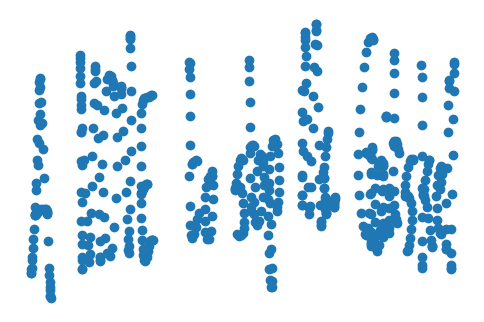

In [28]:
#plt.scatter(x_i[:,0], x_i[:,1])


plt.figure(dpi=100)
plt.axis('off')
#plt.axis('square')

plt.scatter(coords[:,0], coords[:,1])
plt.show()

In [38]:
x2

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-1.16253026e-01, -8.39135477e-01,  0.00000000e+00],
       [-4.84035325e-01, -2.16864735e+00,  0.00000000e+00],
       ...,
       [ 2.39944131e+02, -1.14942537e+01,  0.00000000e+00],
       [ 2.40028679e+02, -1.17838294e+01,  0.00000000e+00],
       [ 2.40073067e+02, -1.18028526e+01,  1.00000000e+00]])

In [14]:
x_i

array([[ 0.        ,  0.        ,  1.        ],
       [-0.11625303, -0.83913548,  0.        ],
       [-0.3677823 , -1.32951188,  0.        ],
       ...,
       [ 0.0253643 , -0.91734206,  0.        ],
       [ 0.08454766, -0.28957572,  0.        ],
       [ 0.04438752, -0.01902322,  1.        ]])

In [29]:
coords

array([[ 2.24242857e+03,  1.04714286e+02,  0.00000000e+00],
       [ 2.23980952e+03,  8.58095238e+01,  0.00000000e+00],
       [ 2.23152381e+03,  5.58571429e+01,  0.00000000e+00],
       ...,
       [ 7.64809524e+03, -1.54238095e+02,  0.00000000e+00],
       [ 7.65000000e+03, -1.60761905e+02,  0.00000000e+00],
       [ 7.65100000e+03, -1.61190476e+02,  1.00000000e+00]])

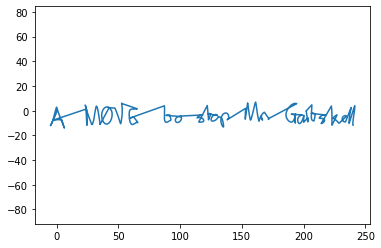

In [57]:
plt.axis('equal')
plt.plot(x2[:,0], x2[:,1])


In [41]:
x= np.array([1,2,3])

In [43]:

x[2:3]

array([3])

In [49]:
DATA = "archidata/0.npy"

data = prepare_synth_data.load_data(DATA)
strokes, chars = prepare_synth_data.process_data(data)

x = np.zeros([len(strokes), drawing.MAX_STROKE_LEN, 3], dtype=np.float32)
x_len = np.zeros([len(strokes)], dtype=np.int16)
c = np.zeros([len(strokes), drawing.MAX_CHAR_LEN], dtype=np.int8)
c_len = np.zeros([len(strokes)], dtype=np.int8)

for i, (stroke, char) in enumerate(zip(strokes, chars)):
    x[i, :len(stroke), :] = stroke
    x_len[i] = len(stroke)

    c[i, :len(char)] = char
    c_len[i] = len(char)


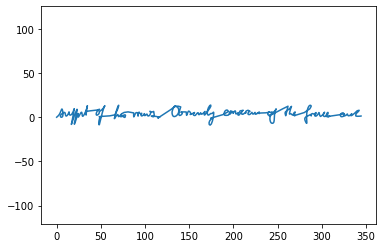

In [54]:
stroke_abs = np.cumsum(stroke[:,:2], axis=0)
plt.axis('equal')
plt.plot(stroke_abs[:,0], stroke_abs[:,1])